# This notebook is for testing the final model (combined) on the holdout test set

# Import modules and load in data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainval = pd.read_csv('./data/trainval_all_combined.csv')
trainval.head()

,id,age,gender,size,breeds.primary,breeds.mixed,log_breed_pop,log_dog_pop,contact.address.state,state_population,state_area,state_region,cg_adpt_time
0,36278338,2,Male,2,Terrier,True,10.291332,9.919066,MN,15.543293,11.373008,Midwest,1 - 2 weeks
1,44480910,3,Male,2,American Staffordshire Terrier,True,9.106423,9.819834,IL,16.362478,10.966784,Midwest,< 3 months
2,41950416,3,Female,3,Greyhound,False,8.146709,9.913190,MI,16.117213,11.480506,Midwest,< 3 months
3,40975541,1,Male,2,Shepherd,True,10.066074,9.913190,MI,16.117213,11.480506,Midwest,1 - 2 weeks
4,33677967,1,Female,2,Golden Retriever,False,8.728912,9.593969,AL,15.402488,10.867101,South,< 1 month


In [3]:
test = pd.read_csv('./data/test_all_combined.csv')
test.head()

,id,age,gender,size,breeds.primary,breeds.mixed,log_breed_pop,log_dog_pop,contact.address.state,state_population,state_area,state_region,cg_adpt_time
0,30190826,1,Female,2,Hound,True,9.583695,9.739261,IN,15.717563,10.502873,Midwest,> 3 months
1,43437410,2,Male,2,Hound,True,9.583695,10.196456,MA,15.746440,9.264355,Northeast,1 - 2 weeks
2,36961937,3,Male,1,Chihuahua,True,10.711993,8.761863,IA,14.966258,10.938023,Midwest,< 3 months
3,35269929,3,Female,3,Pit Bull Terrier,True,10.450481,9.146974,NJ,16.016381,9.073604,Northeast,1 - 2 weeks
4,36960456,3,Male,2,Basset Hound,True,8.216899,8.936956,NE,14.474350,11.256199,Midwest,> 3 months


# Define the categorical columns and split into feature vectors and target

In [4]:
# Define these columns as categorical instead of object
cat_col = ['gender','state_region']
trainval[cat_col]=trainval[cat_col].astype('category')
test[cat_col]=test[cat_col].astype('category')

In [5]:
#features
X_features = ['age', 'gender', 'size', 'log_breed_pop',
              'breeds.mixed', 'log_dog_pop', 'state_population',
             'state_area', 'state_region']
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,log_breed_pop,breeds.mixed,log_dog_pop,state_population,state_area,state_region
0,2,Male,2,10.291332,True,9.919066,15.543293,11.373008,Midwest
1,3,Male,2,9.106423,True,9.819834,16.362478,10.966784,Midwest
2,3,Female,3,8.146709,False,9.913190,16.117213,11.480506,Midwest
3,1,Male,2,10.066074,True,9.913190,16.117213,11.480506,Midwest
4,1,Female,2,8.728912,False,9.593969,15.402488,10.867101,South


In [7]:
trainval_X.dtypes

age                    int64
gender              category
size                   int64
log_breed_pop        float64
breeds.mixed            bool
log_dog_pop          float64
state_population     float64
state_area           float64
state_region        category
dtype: object

In [8]:
test_X = test[X_features]
test_y = test['cg_adpt_time']
test_X.head()

,age,gender,size,log_breed_pop,breeds.mixed,log_dog_pop,state_population,state_area,state_region
0,1,Female,2,9.583695,True,9.739261,15.717563,10.502873,Midwest
1,2,Male,2,9.583695,True,10.196456,15.746440,9.264355,Northeast
2,3,Male,1,10.711993,True,8.761863,14.966258,10.938023,Midwest
3,3,Female,3,10.450481,True,9.146974,16.016381,9.073604,Northeast
4,3,Male,2,8.216899,True,8.936956,14.474350,11.256199,Midwest


In [9]:
trainval_y = trainval['cg_adpt_time']
trainval_y.head()

0    1 - 2 weeks
1     < 3 months
2     < 3 months
3    1 - 2 weeks
4      < 1 month
Name: cg_adpt_time, dtype: object

# One hot encode to check feature importances

In [11]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_col = ['gender','state_region']

In [17]:
# Best performing model from model selection
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_trainval = pd.DataFrame(oh.fit_transform(trainval_X[cat_col]))
OH_cols_trainval.columns = oh.get_feature_names(cat_col)
OH_cols_test = pd.DataFrame(oh.transform(test_X[cat_col]))
OH_cols_test.columns = oh.get_feature_names(cat_col)
# One-hot encoding removed index; put it back
OH_cols_trainval.index = trainval_X.index
OH_cols_test.index = test_X.index
rest_trainval = trainval_X.drop(cat_col, axis=1)
rest_test = test_X.drop(cat_col, axis=1)
OH_trainval_X = pd.concat([rest_trainval, OH_cols_trainval], axis=1)
OH_test_X = pd.concat([rest_test, OH_cols_test], axis=1)

In [18]:
OH_trainval_X.head()

,age,size,log_breed_pop,breeds.mixed,log_dog_pop,state_population,state_area,gender_Female,gender_Male,state_region_Midwest,state_region_Northeast,state_region_South,state_region_West
0,2,2,10.291332,True,9.919066,15.543293,11.373008,0.0,1.0,1.0,0.0,0.0,0.0
1,3,2,9.106423,True,9.819834,16.362478,10.966784,0.0,1.0,1.0,0.0,0.0,0.0
2,3,3,8.146709,False,9.913190,16.117213,11.480506,1.0,0.0,1.0,0.0,0.0,0.0
3,1,2,10.066074,True,9.913190,16.117213,11.480506,0.0,1.0,1.0,0.0,0.0,0.0
4,1,2,8.728912,False,9.593969,15.402488,10.867101,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
OH_trainval_X.columns

Index(['age', 'size', 'log_breed_pop', 'breeds.mixed', 'log_dog_pop',
       'state_population', 'state_area', 'gender_Female', 'gender_Male',
       'state_region_Midwest', 'state_region_Northeast', 'state_region_South',
       'state_region_West'],
      dtype='object')

In [21]:
from sklearn.ensemble import RandomForestClassifier
import time
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_trainval_X, trainval_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_test_X)
end = time.time()
pred_time = (end - start)

print('Fit time: {} / Predict time: {} ---- Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round((y_pred==test_y).sum()/len(y_pred), 3)))

Fit time: 87.621 / Predict time: 5.305 ---- Accuracy: 0.308


# Plot feature importances

In [22]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = OH_trainval_X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [57]:
feature_importances

,importance
log_breed_pop,0.736047
age,0.082994
size,0.040648
state_area,0.033719
state_population,0.028132
log_dog_pop,0.027379
breeds.mixed,0.022588
gender_Male,0.007357
gender_Female,0.007340
state_region_West,0.006188


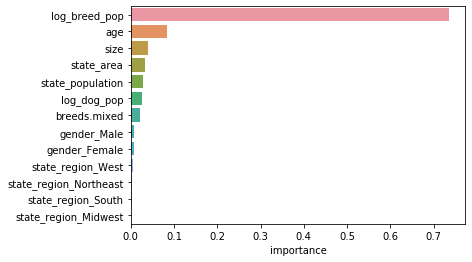

In [59]:
import seaborn as sns
fig = plt.subplots()
sns.barplot(y=feature_importances.index, x=feature_importances.importance)

In [40]:
feature_importances.to_csv("rf_feat_imp.csv", header=True, index=True)

In [46]:
test_X.iloc[0]

age                                 Young
gender                             Female
size                                Large
breed_pop                            High
breeds.primary           Pit Bull Terrier
breeds.mixed                        False
contact.address.state                  NC
Name: 0, dtype: object

# Test model on subsets of breed for any difference between breeds

In [32]:
trainval2 = trainval[trainval['breeds.primary']=='Chihuahua']
test2 = test[test['breeds.primary']=='Chihuahua']

In [33]:
#features
X_features = ['age', 'gender', 'size',
              'breeds.mixed', 'log_dog_pop', 'state_population',
             'state_area', 'state_region']
trainval2_X = trainval2[X_features]
test2_X = test2[X_features]

In [34]:
trainval2_y = trainval2['cg_adpt_time']
test2_y = test2['cg_adpt_time']

In [35]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_col = ['gender','state_region']
OH_cols_trainval2 = pd.DataFrame(oh.fit_transform(trainval2_X[cat_col]))
OH_cols_trainval2.columns = oh.get_feature_names(cat_col)
OH_cols_test2 = pd.DataFrame(oh.transform(test2_X[cat_col]))
OH_cols_test2.columns = oh.get_feature_names(cat_col)
# One-hot encoding removed index; put it back
OH_cols_trainval2.index = trainval2_X.index
OH_cols_test2.index = test2_X.index
rest_trainval2 = trainval2_X.drop(cat_col, axis=1)
rest_test2 = test2_X.drop(cat_col, axis=1)
OH_trainval2_X = pd.concat([rest_trainval2, OH_cols_trainval2], axis=1)
OH_test2_X = pd.concat([rest_test2, OH_cols_test2], axis=1)

In [36]:
len(trainval2_X)

35886

In [37]:
rf2 = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)

start = time.time()
rf_model2 = rf2.fit(OH_trainval2_X, trainval2_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model2.predict(OH_test2_X)
end = time.time()
pred_time = (end - start)

print('Fit time: {} / Predict time: {} ---- Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round((y_pred==test2_y).sum()/len(y_pred), 3)))

Fit time: 2.63 / Predict time: 0.242 ---- Accuracy: 0.302


In [38]:
feature_importances2 = pd.DataFrame(rf_model2.feature_importances_,index = OH_trainval2_X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances2.head(20)

,importance
age,0.264904
state_area,0.174707
state_population,0.153633
log_dog_pop,0.129368
size,0.081547
breeds.mixed,0.075901
gender_Female,0.036248
gender_Male,0.035807
state_region_Northeast,0.014638
state_region_West,0.012567


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import time
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
pipeline_final = Pipeline(steps=[('preprocessor', oh),('model', rf)])

In [14]:
pipeline_final.fit(trainval_X, trainval_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=False)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=30, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=-1,
                                        oob_score=False, random_state=

In [18]:
start = time.time()
y_pred = pipeline_final.predict(test_X)
end = time.time()
pred_time = (end - start)

In [20]:
round((y_pred==test_y).sum()/len(y_pred), 3)

0.326

In [21]:
import pickle
filename = './models/rfpipe_final.pkl'
pickle.dump(pipeline_final, open(filename, 'wb'))